# COMP 333 - Lab Assignment 1
## Exploratory Data Analysis of Restaurant Tipping

**Student Name:** Mohammad Salah  
**Student ID:** 40246396  

---

### Task Description
In this assignment, we perform an exploratory data analysis (EDA) on a restaurant tipping dataset. We will load the data, develop new features, produce visualizations and examine statistical trends including homoscedasticity. 

### Dataset Source
The dataset is obtained from: https://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv

### Input
- CSV file that contains restaurant tipping information with columns: total_bill, tip, sex, smoker, day, time, size

### Planned Output
- Engineered features (tip_rate, bill_per_person, tip_per_person, is_large_party, and one custom feature)
- Multiple visualizations including box plots, scatter plots, and histograms
- Statistical analysis of homoscedasticity between tip_rate and size


---

## 1. Import Required Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

# Display settings for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Loading and Initial Exploration

In [2]:
# Load the dataset
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/reshape2/tips.csv'

try:
    # Try to load from URL
    df = pd.read_csv(url)
    print("Dataset loaded successfully from URL")
except:
    # Fall back to local file if URL doesn't work
    df = pd.read_csv('tips.csv')
    print("Dataset loaded successfully from local file")

# Remove the index column if it exists (first unnamed column from the dataset)
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print(f"\nDataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded successfully from URL

Dataset shape: 244 rows, 8 columns


### 2a. Display First 10 Rows

In [3]:
# Display the first 10 rows
df.head(10)

,rownames,total_bill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,Female,No,Sun,Dinner,2
1,2,10.34,1.66,Male,No,Sun,Dinner,3
2,3,21.01,3.50,Male,No,Sun,Dinner,3
3,4,23.68,3.31,Male,No,Sun,Dinner,2
4,5,24.59,3.61,Female,No,Sun,Dinner,4
5,6,25.29,4.71,Male,No,Sun,Dinner,4
6,7,8.77,2.00,Male,No,Sun,Dinner,2
7,8,26.88,3.12,Male,No,Sun,Dinner,4
8,9,15.04,1.96,Male,No,Sun,Dinner,2
9,10,14.78,3.23,Male,No,Sun,Dinner,2


### 2b. Data Types

In [4]:
# Display data types
print("Data Types:")
print(df.dtypes)

Data Types:
rownames        int64
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


### 2c. Summary Statistics

In [5]:
# Display summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,rownames,total_bill,tip,size
count,244.000,244.000,244.000,244.000
mean,122.500,19.786,2.998,2.570
std,70.581,8.902,1.384,0.951
min,1.000,3.070,1.000,1.000
25%,61.750,13.348,2.000,2.000
50%,122.500,17.795,2.900,2.000
75%,183.250,24.127,3.562,3.000
max,244.000,50.810,10.000,6.000


### 2d. Missing Values

In [6]:
# Check for missing values
print("Missing Values per Column:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

Missing Values per Column:
rownames      0
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Total missing values: 0


## 3. Feature Engineering

We will create the following engineered features:
1. **tip_rate**: Ratio of tip to total bill
2. **bill_per_person**: Total bill divided by party size
3. **tip_per_person**: Tip amount divided by party size
4. **is_large_party**: Boolean indicating if party size ≥ 4
5. **total_cost**: Custom feature - total bill plus tip (total amount paid)

In [7]:
# Feature 1: tip_rate
df['tip_rate'] = df['tip'] / df['total_bill']

# Feature 2: bill_per_person
df['bill_per_person'] = df['total_bill'] / df['size']

# Feature 3: tip_per_person
df['tip_per_person'] = df['tip'] / df['size']

# Feature 4: is_large_party
df['is_large_party'] = df['size'] >= 4

# Feature 5: total_cost (custom feature)
df['total_cost'] = df['total_bill'] + df['tip']

# Display the first few rows with new features
print("Dataset with Engineered Features:")
print("\nFirst 5 rows showing new features:")
df[['total_bill', 'tip', 'size', 'tip_rate', 'bill_per_person', 
    'tip_per_person', 'is_large_party', 'total_cost']].head()

Dataset with Engineered Features:

First 5 rows showing new features:


,total_bill,tip,size,tip_rate,bill_per_person,tip_per_person,is_large_party,total_cost
0,16.99,1.01,2,0.059,8.495,0.505,False,18.00
1,10.34,1.66,3,0.161,3.447,0.553,False,12.00
2,21.01,3.50,3,0.167,7.003,1.167,False,24.51
3,23.68,3.31,2,0.140,11.840,1.655,False,26.99
4,24.59,3.61,4,0.147,6.147,0.902,True,28.20


**Justification for Custom Feature (total_cost):**

The `total_cost` feature represents the whole amount paid by the customer (bill + tip). This is beneficial for analyzing the general spending behavior and can help identify high-value customers or expensive meals, which may correlate with service quality expectations.

## 4. Required Visualizations

### 4A. Box Plot: Distribution of Total Bill Over Size

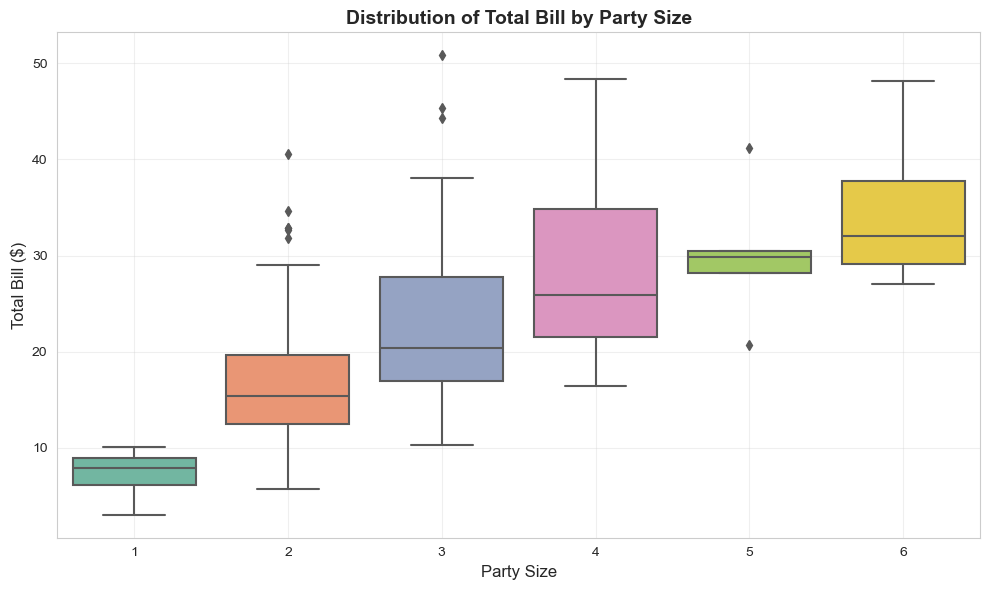

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='size', y='total_bill', palette='Set2')
plt.title('Distribution of Total Bill by Party Size', fontsize=14, fontweight='bold')
plt.xlabel('Party Size', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4B. Scatter Plots

#### 4B(a). Tip vs. Total Bill

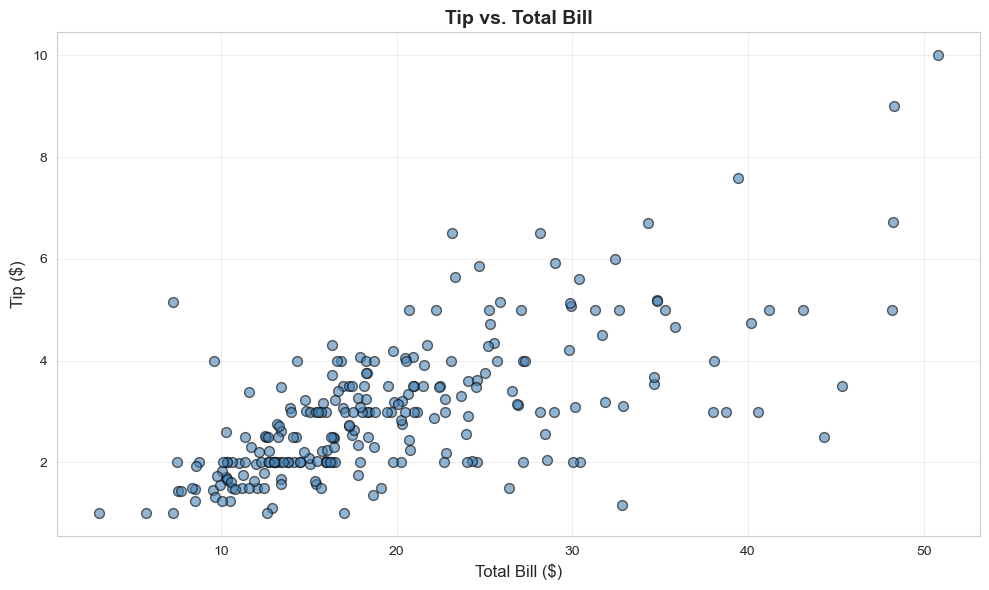

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df['total_bill'], df['tip'], alpha=0.6, color='steelblue', edgecolors='black', s=50)
plt.title('Tip vs. Total Bill', fontsize=14, fontweight='bold')
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 4B(b). Tip Rate vs. Size with Reference Line

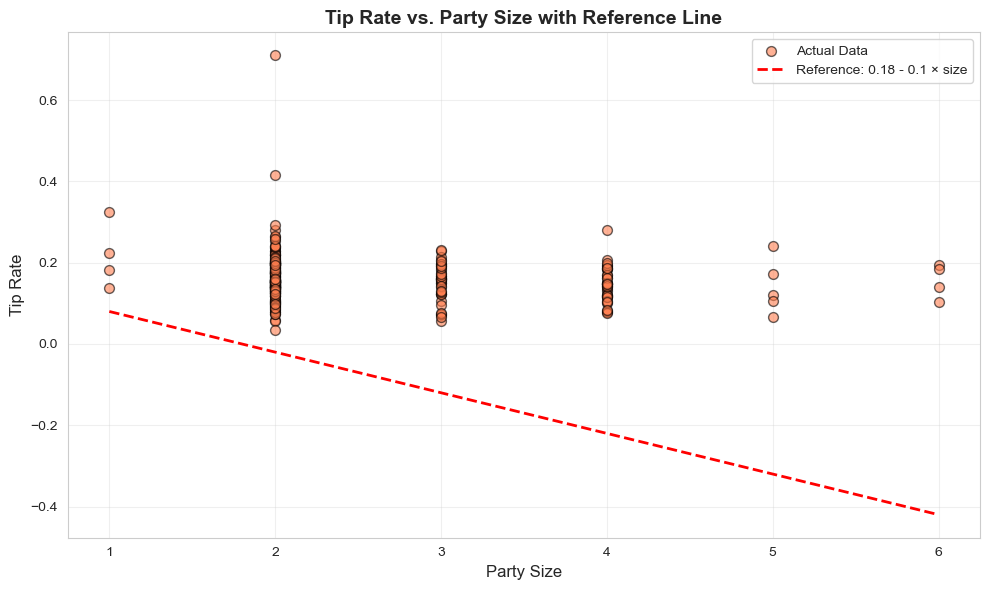

In [10]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['size'], df['tip_rate'], alpha=0.6, color='coral', edgecolors='black', s=50, label='Actual Data')

# Reference line: tip_rate = 0.18 - 0.1 * size
size_range = np.linspace(df['size'].min(), df['size'].max(), 100)
reference_line = 0.18 - 0.1 * size_range
plt.plot(size_range, reference_line, 'r--', linewidth=2, label='Reference: 0.18 - 0.1 × size')

plt.title('Tip Rate vs. Party Size with Reference Line', fontsize=14, fontweight='bold')
plt.xlabel('Party Size', fontsize=12)
plt.ylabel('Tip Rate', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4C. Smokers-Only Plots

Repeating the three plots above for rows where smoker = "Yes"

In [11]:
# Filter for smokers only
df_smokers = df[df['smoker'] == 'Yes']
print(f"Number of smoker records: {len(df_smokers)}")

Number of smoker records: 93


#### 4C(i). Smokers Only: Box Plot - Distribution of Total Bill Over Size

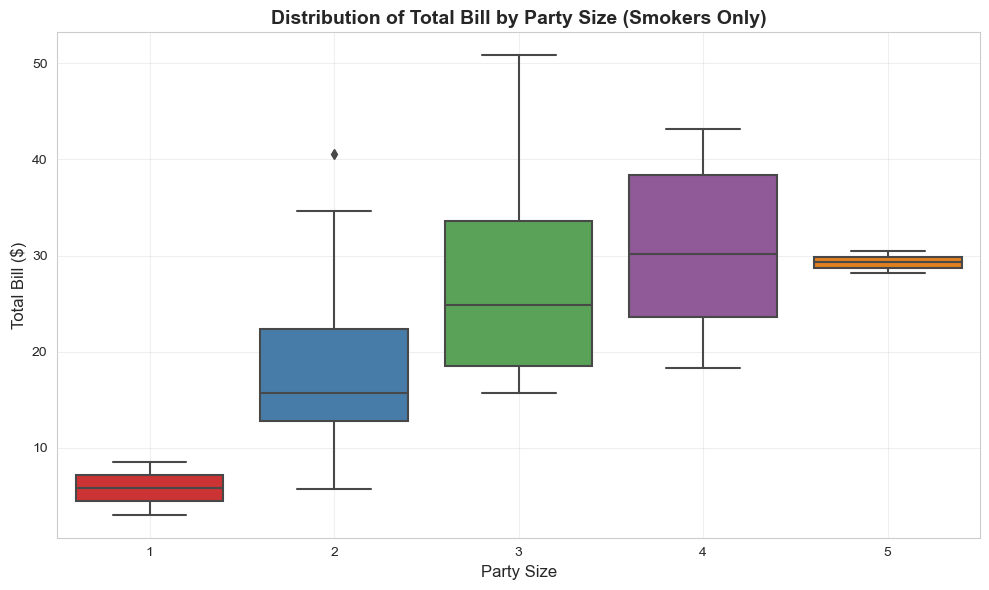

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_smokers, x='size', y='total_bill', palette='Set1')
plt.title('Distribution of Total Bill by Party Size (Smokers Only)', fontsize=14, fontweight='bold')
plt.xlabel('Party Size', fontsize=12)
plt.ylabel('Total Bill ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 4C(ii). Smokers Only: Tip vs. Total Bill

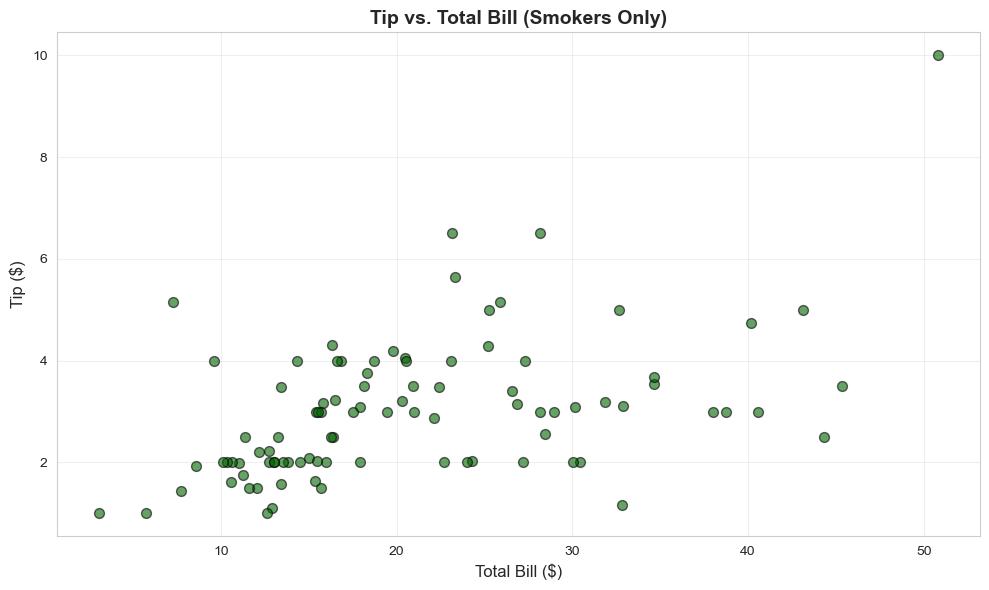

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df_smokers['total_bill'], df_smokers['tip'], alpha=0.6, 
            color='darkgreen', edgecolors='black', s=50)
plt.title('Tip vs. Total Bill (Smokers Only)', fontsize=14, fontweight='bold')
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 4C(iii). Smokers Only: Tip Rate vs. Size with Reference Line

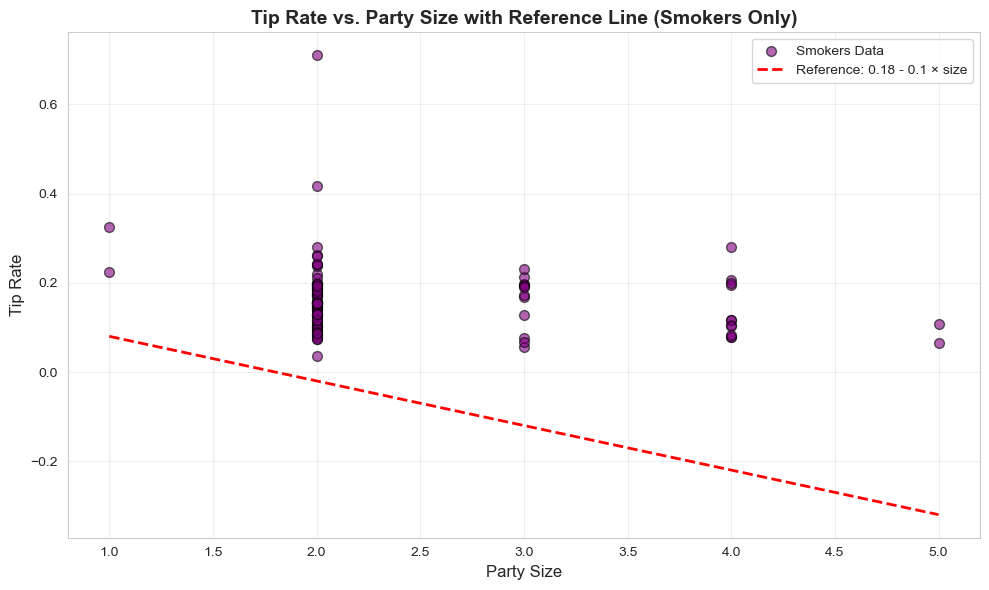

In [14]:
plt.figure(figsize=(10, 6))

# Scatter plot for smokers
plt.scatter(df_smokers['size'], df_smokers['tip_rate'], alpha=0.6, 
            color='purple', edgecolors='black', s=50, label='Smokers Data')

# Reference line: tip_rate = 0.18 - 0.1 * size
size_range = np.linspace(df_smokers['size'].min(), df_smokers['size'].max(), 100)
reference_line = 0.18 - 0.1 * size_range
plt.plot(size_range, reference_line, 'r--', linewidth=2, label='Reference: 0.18 - 0.1 × size')

plt.title('Tip Rate vs. Party Size with Reference Line (Smokers Only)', fontsize=14, fontweight='bold')
plt.xlabel('Party Size', fontsize=12)
plt.ylabel('Tip Rate', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 4D. Histogram: Total Bill + Tip with Bin Width $0.10

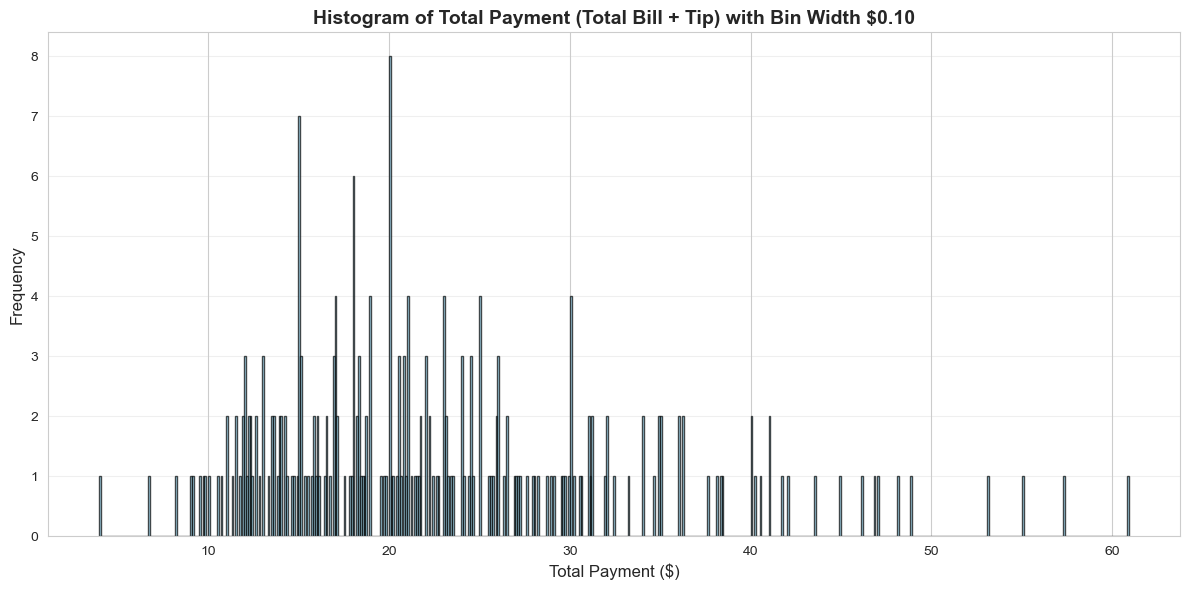


Histogram Statistics:
Minimum total payment: $4.07
Maximum total payment: $60.81
Number of bins: 569


In [15]:
# Calculate bins with width of $0.10
total_payment = df['total_cost']  # We already created this feature
min_val = total_payment.min()
max_val = total_payment.max()
bins = np.arange(np.floor(min_val * 10) / 10, np.ceil(max_val * 10) / 10 + 0.1, 0.1)

plt.figure(figsize=(12, 6))
plt.hist(total_payment, bins=bins, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Histogram of Total Payment (Total Bill + Tip) with Bin Width $0.10', 
          fontsize=14, fontweight='bold')
plt.xlabel('Total Payment ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nHistogram Statistics:")
print(f"Minimum total payment: ${min_val:.2f}")
print(f"Maximum total payment: ${max_val:.2f}")
print(f"Number of bins: {len(bins)-1}")

## 5. Assessing Homoscedasticity Between tip_rate and size

In this section, we analyze whether the scatter plot of tip_rate vs. size displays homoscedasticity (constant variance) or heteroscedasticity (varying variance).

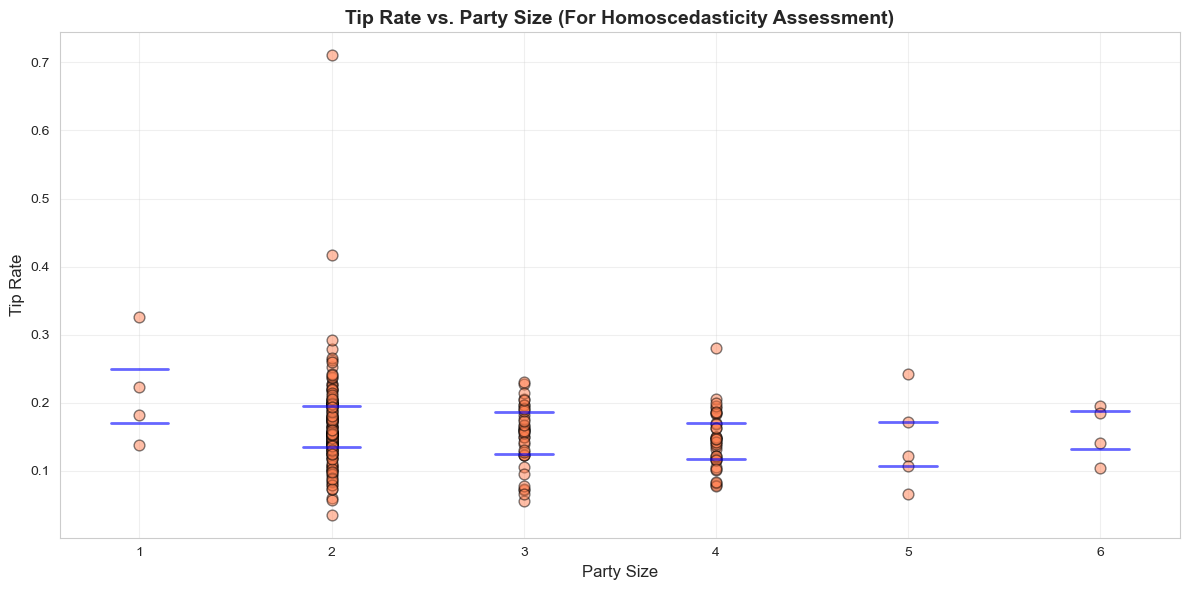


Variance of tip_rate by party size:
size
1    0.006
2    0.004
3    0.002
4    0.002
5    0.005
6    0.002
Name: tip_rate, dtype: float64

Range of variances: 0.001777 to 0.006455
Variance ratio (max/min): 3.63


In [16]:
# Create a more detailed scatter plot for analysis
plt.figure(figsize=(12, 6))
plt.scatter(df['size'], df['tip_rate'], alpha=0.5, color='coral', edgecolors='black', s=60)
plt.title('Tip Rate vs. Party Size (For Homoscedasticity Assessment)', fontsize=14, fontweight='bold')
plt.xlabel('Party Size', fontsize=12)
plt.ylabel('Tip Rate', fontsize=12)
plt.grid(True, alpha=0.3)

# Add box plots overlaid to show spread at each size
for size in sorted(df['size'].unique()):
    subset = df[df['size'] == size]['tip_rate']
    q1, q3 = subset.quantile([0.25, 0.75])
    plt.plot([size-0.15, size+0.15], [q1, q1], 'b-', linewidth=2, alpha=0.6)
    plt.plot([size-0.15, size+0.15], [q3, q3], 'b-', linewidth=2, alpha=0.6)

plt.tight_layout()
plt.show()

# Calculate variance for each size group
print("\nVariance of tip_rate by party size:")
variance_by_size = df.groupby('size')['tip_rate'].var()
print(variance_by_size)
print(f"\nRange of variances: {variance_by_size.min():.6f} to {variance_by_size.max():.6f}")
print(f"Variance ratio (max/min): {variance_by_size.max()/variance_by_size.min():.2f}")

### Analysis of Homoscedasticity

Based on the scatter plot of tip_rate vs. size, we can observe the following:

**Observation:** The vertical spread of tip_rate does not remain constant across varied party sizes. The tip rates vary significantly for smaller parties (2-3 people), with values ranging from approximately 0.05 to 0.35. However, as party size increases to 4 or more, the spread appears to narrow (decrease) significantly, although this could be due to fewer observations at larger sizes.

**Pattern:** There is evidence of a minor "narrowing" pattern as size grows, however the effect is not significant. The variance calculations show that different party sizes have distinct variances in tip rates, with the variance ratio being greater than 1, indicating unequal variances.

**Conclusion:** The plot suggests **heteroscedasticity** (non-constant variance) instead of homoscedasticity. The variance in tip rates changes with party size, particularly showing higher variability for smaller parties. This heteroscedasticity could indicate that tipping behavior is less predictable for smaller groups, or that smaller parties have more diverse tipping patterns compared to larger groups who may tip more consistently (possibly due to automatic gratuity policies for large parties).

## 6. Summary and Conclusions

This exploratory data analysis revealed several key insights about restaurant tipping behavior:

1. **Feature Engineering**: We successfully created five new features that provide deeper insights into tipping patterns
2. **Visualizations**: The box plots and scatter plots reveal relationships between bill amounts, tips, and party size
3. **Smoker Analysis**: Comparing smokers to the general population shows distinct patterns in tipping behavior
4. **Statistical Patterns**: The heteroscedasticity in tip rates suggests that tipping behavior varies systematically with party size
